In [4]:
#it contains an indian food analysis
#also contains a lot of categorical data
#taken dataset from kaggle.com

In [5]:
!pip install wordcloud

In [2]:
#import all the libraries
import pandas as pd
import numpy as np
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,ImageColorGenerator

In [3]:
data=pd.read_csv("C://Users//Sakshi more//OneDrive//Desktop//new//indian_food.csv")
data.head(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
5,Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East
6,Jalebi,"Maida, corn flour, baking soda, vinegar, curd,...",vegetarian,10,50,sweet,dessert,Uttar Pradesh,North
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
8,Kalakand,"Milk, cottage cheese, sugar",vegetarian,20,30,sweet,dessert,West Bengal,East
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1


In [4]:
data.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [6]:
data.isnull().any()

name              False
ingredients       False
diet              False
prep_time         False
cook_time         False
flavor_profile    False
course            False
state             False
region             True
dtype: bool

In [7]:
#to check the total null values
data.isnull().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [8]:
#to replace _1 with nan
data=data.replace(-1,np.nan)
data=data.replace('-1',np.nan)

In [9]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15.0,60.0,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15.0,30.0,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15.0,40.0,sweet,dessert,West Bengal,East


In [10]:
data.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [11]:
data.shape

(255, 9)

In [12]:
#to check how many vegitarian and non vegitarian dishes are there
pie_data=data.diet.value_counts().reset_index()

In [21]:
cooking_time=data[['cook_time','name']]
cooking_time.head()

,cook_time,name
0,25.0,Balu shahi
1,30.0,Boondi
2,60.0,Gajar ka halwa
3,30.0,Ghevar
4,40.0,Gulab jamun


In [22]:
#sort the data
cooking_time=cooking_time.sort_values(['cook_time'],ascending=True)

In [23]:
cooking_time

,cook_time,name
109,2.0,Pani puri
111,5.0,Papad
11,5.0,Lassi
147,5.0,Papadum
212,6.0,Lilva Kachori
...,...,...
244,NaN,Pakhala
246,NaN,Payokh
248,NaN,Red Rice
252,NaN,Shufta


In [24]:
ten_cook_quickly=cooking_time.head(10)

In [26]:
cooking_time_longest=cooking_time.sort_values(['cook_time'],ascending=False)

In [27]:
tencooking_time_longest=cooking_time_longest.head(10)
tencooking_time_longest

,cook_time,name
62,720.0,Shrikhand
114,120.0,Pindi chana
27,120.0,Malapua
75,120.0,Biryani
130,90.0,Idli
115,90.0,Rajma chaval
128,90.0,Dosa
34,90.0,Rasgulla
142,90.0,Kuzhakkattai
144,90.0,Masala Dosa


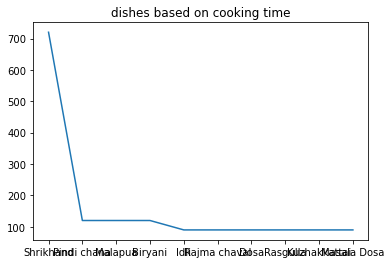

In [28]:
y=tencooking_time_longest['cook_time']
x=tencooking_time_longest['name']
plt.plot(x,y)
plt.title('dishes based on cooking time')
plt.show()